In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
data_mc = pd.read_csv("runs/mc-0.001-0.001-True-SS100-learnStd=False-8131-1556265262")
data_reinforce = pd.read_csv("runs/reinforce-0.001-0.001-True-learnStd=False-4117-1556266351")

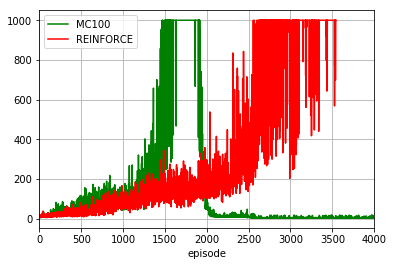

In [177]:
ax = data_mc.loc[data_mc['metric_name'] == "total_reward"].plot(x='episode', y='value', color="green", label="MC100")
data_reinforce.loc[data_reinforce['metric_name'] == "total_reward"].plot(ax=ax, x='episode', y='value', color="red", label="REINFORCE")
plt.legend()
plt.grid()
plt.show()

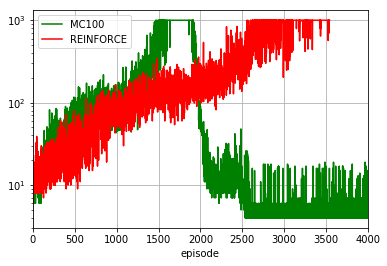

In [178]:
ax = data_mc.loc[data_mc['metric_name'] == "total_reward"].plot(x='episode', y='value', color="green", label="MC100", logy=True)
data_reinforce.loc[data_reinforce['metric_name'] == "total_reward"].plot(ax=ax, x='episode', y='value', color="red", label="REINFORCE", logy=True)
plt.legend()
plt.grid()
plt.show()